<font color = "green"><b> Resume Screening using Natural Language Processing

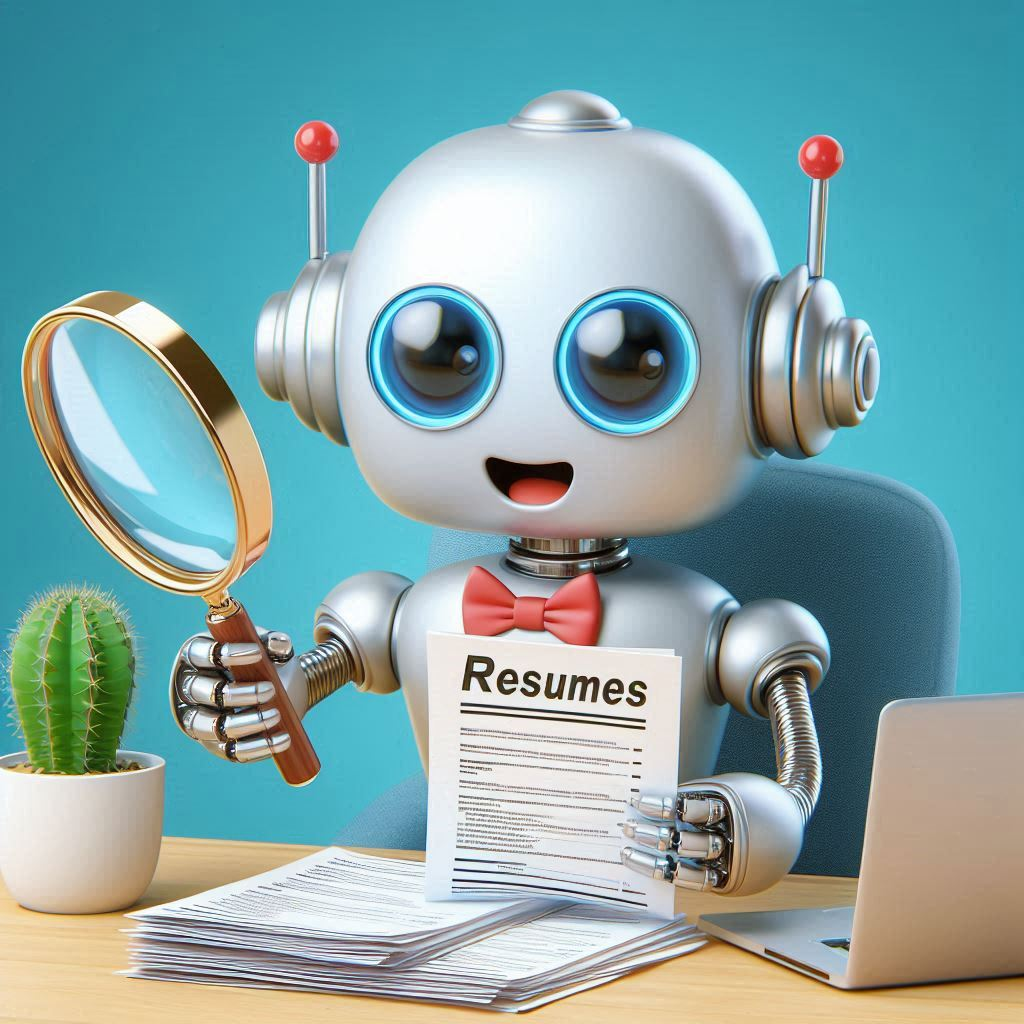

<font color = "red"><b>
Problem Statement:

Develop a Natural Language Processing (NLP) model to predict the category of resumes based on the provided dataset. Given a resume text, the model should accurately classify it into one of the predefined categories


<font color="green"><b> Importing the libraries and dataset

In [ ]:
import pandas as pd  # Importing pandas library for data manipulation and analysis.
import numpy as np  # Importing numpy library for numerical operations and array manipulation.
import matplotlib.pyplot as plt  # Importing matplotlib library for data visualization.
import seaborn as sns  # Importing seaborn library for enhanced data visualization capabilities.
import nltk  # Importing NLTK (Natural Language Toolkit) for natural language processing tasks such as tokenization, stopwords removal, etc.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Resume_Dataset.csv")  # Reading the CSV file containing the resume dataset into a pandas DataFrame.


In [ ]:
df.head()  # Displaying the first few rows of the DataFrame to inspect the data structure and content.


,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
df.shape  # Checking the dimensions of the DataFrame (number of rows and columns).


(962, 2)

In [ ]:
df["Category"].value_counts()  # Counting the occurrences of each category in the "Category" column of the DataFrame.


Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

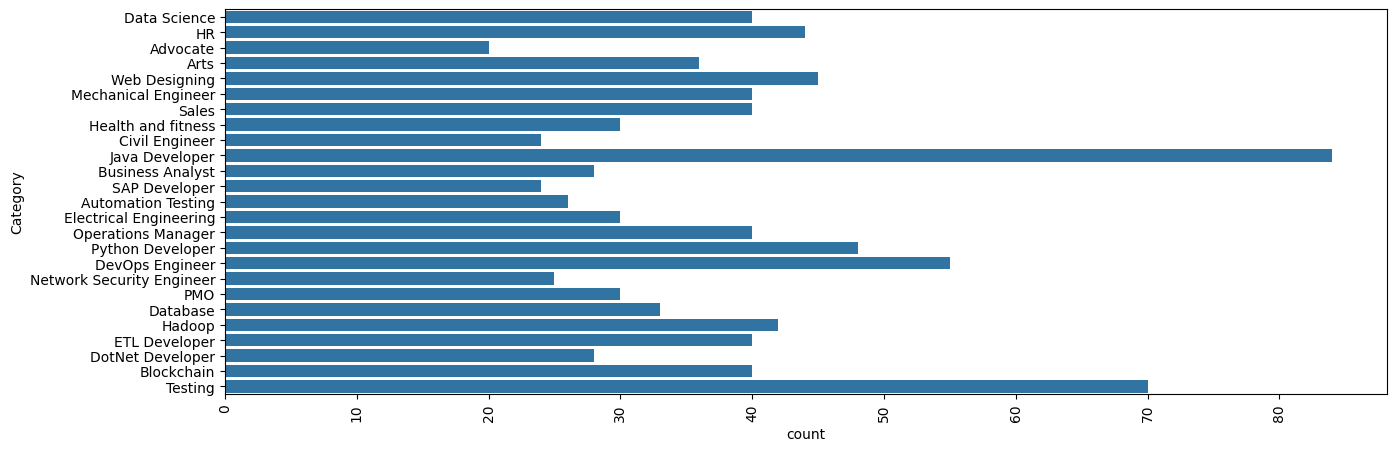

In [ ]:
plt.figure(figsize=(15,5))  # Setting the size of the plot figure.
sns.countplot(df['Category'])  # Creating a count plot to visualize the distribution of resumes across different categories.
plt.xticks(rotation=90)  # Rotating the x-axis labels for better readability.
plt.show()  # Displaying the plot.


In [ ]:
df["Category"][0]  # Accessing the category of the first resume in the DataFrame.


'Data Science'

In [ ]:
df["Resume"][0]  # Accessing the resume text of the first entry in the "Resume" column of the DataFrame.


'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [ ]:
import re  # Importing the regular expression module for text processing.

def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)  # Removing URLs from the text.
    cleanText = re.sub('RT|cc', ' ', cleanText)  # Removing RT (retweet) and cc (carbon copy) mentions.
    cleanText = re.sub('#\S+\s', ' ', cleanText)  # Removing hashtags.
    cleanText = re.sub('@\S+', '  ', cleanText)  # Removing mentions (@username).
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)  # Removing special characters.
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)  # Removing non-ASCII characters.
    cleanText = re.sub('\s+', ' ', cleanText)  # Removing extra whitespaces.
    return cleanText  # Returning the cleaned text.


In [ ]:
cleanResume("my #### $ #  #anupkolhe webiste like is this http://heloword and access it @gmain.com")

'my webiste like is this and a ess it '

In [ ]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))  # Applying the cleanResume function to clean the text in the "Resume" column of the DataFrame.

In [ ]:
df["Resume"][0]  # Accessing the resume text of the first entry in the "Resume" column of the DataFrame.

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [ ]:
from sklearn.preprocessing import LabelEncoder  # Importing LabelEncoder from scikit-learn for encoding categorical variables.

le = LabelEncoder()  # Instantiating a LabelEncoder object for encoding categories.


In [ ]:
le.fit(df['Category'])  # Fitting the LabelEncoder to the "Category" column to learn the mapping between categories and numerical labels.
df['Category'] = le.transform(df['Category'])  # Transforming the categorical labels into numerical labels.


In [ ]:
df # Verifying the changes

,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 to May 2017 B E UIT...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...
957,23,Computer Skills Proficient in MS office Word B...
958,23,Willingness to a ept the challenges Positive ...
959,23,PERSONAL SKILLS Quick learner Eagerness to lea...
960,23,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [ ]:
df.Category.unique() # Checking for unique categories

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [ ]:

# ['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
#        'Mechanical Engineer', 'Sales', 'Health and fitness',
#        'Civil Engineer', 'Java Developer', 'Business Analyst',
#        'SAP Developer', 'Automation Testing', 'Electrical Engineering',
#        'Operations Manager', 'Python Developer', 'DevOps Engineer',
#        'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
#        'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
#       dtype=object)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer  # Importing TfidfVectorizer from scikit-learn for text vectorization.

tfidf = TfidfVectorizer(stop_words='english')  # Instantiating a TfidfVectorizer object with English stopwords removed.
tfidf.fit(df['Resume'])  # Fitting the TfidfVectorizer to the text data in the "Resume" column to learn the vocabulary.
requiredText = tfidf.transform(df['Resume'])  # Transforming the text data into TF-IDF vectors.


In [ ]:
from sklearn.model_selection import train_test_split  # Importing train_test_split function from scikit-learn for splitting the dataset.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(requiredText, df['Category'], test_size=0.2, random_state=42)


In [ ]:
X_train.shape

(769, 7351)

In [ ]:
X_test.shape

(193, 7351)

<font color="green"><b>We use the One-vs-Rest (OvR) strategy with K-Nearest Neighbors (KNN) for multi-class classification because KNN is naturally a binary classifier. OvR extends KNN to handle multiple classes by training one classifier per class. This approach is straightforward, interpretable, and computationally efficient, making it suitable for multi-class problems while leveraging the simplicity of KNN.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  # Importing KNeighborsClassifier from scikit-learn for K-Nearest Neighbors classification.
from sklearn.multiclass import OneVsRestClassifier  # Importing OneVsRestClassifier from scikit-learn for multi-class classification.
from sklearn.metrics import accuracy_score  # Importing accuracy_score from scikit-learn for evaluating model performance.

clf = OneVsRestClassifier(KNeighborsClassifier())  # Instantiating a OneVsRestClassifier with KNeighborsClassifier as the base estimator.
clf.fit(X_train, y_train)  # Training the classifier on the training data.
ypred = clf.predict(X_test)  # Predicting the categories for the test data.
print(accuracy_score(y_test, ypred))  # Calculating and printing the accuracy score of the model.


0.9844559585492227


<font color="green"><b>The model achieved an impressive accuracy score of 98.45%, indicating its effectiveness in accurately classifying resumes into their respective categories. This high accuracy suggests that the model's predictions closely match the actual categories of the resumes in the test dataset.

In [ ]:
ypred

array([15, 15, 15, 13, 14, 17, 16,  2,  0, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23, 21, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8,  0,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
        5, 11, 15, 12,  3,  5,  3,  7, 12, 19,  8, 20, 19,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11,  5, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20, 21,  6,  7, 23])

In [ ]:
import pickle  # Importing the pickle module for saving model objects.

pickle.dump(tfidf, open('tfidf.pkl', 'wb'))  # Saving the TF-IDF vectorizer object as 'tfidf.pkl'.
pickle.dump(clf, open('clf.pkl', 'wb'))  # Saving the trained classifier object as 'clf.pkl'.


In [ ]:
import pickle  # Importing the pickle module for saving model objects.

# Save the tfidf object
with open('tfidf.pkl', 'wb') as tfidf_file:
    pickle.dump(tfidf, tfidf_file)  # Saving the TF-IDF vectorizer object as 'tfidf.pkl'.

# Save the clf object
with open('clf.pkl', 'wb') as clf_file:
    pickle.dump(clf, clf_file)  # Saving the trained classifier object as 'clf.pkl'.


<font color="green"><b>Checking the model prediction on Sample unseen resume

In [ ]:
myresume="""
Anup Mahadu Kolhe
+91 9657055893 | anupkolhe07@gmail.com | Portfolio | LinkedIn | GitHub
Career Objective
Seeking a career transition into Data Science and Analytics, leveraging expertise in supply chain management and engineering to utilize advanced analytics tools and techniques for driving strategic decision-making and solving complex challenges.
Professional Experience
Junior Supply Chain Analyst | Neilsoft Private Limited, Pune                                                                                        	June 2022 - June 2023
•	Collaborated with vendors and clients in the USA, Germany, and India, utilizing advanced data analysis techniques to monitor and optimize the manufacturing process of equipment from the release of Purchase Orders (PO) to delivery on-site.
•	Applied Advanced Excel and Pivot tables to analyze manufacturing data and identify trends, inefficiencies, and opportunities for improvement.
•	Developed and maintained custom Power BI reports to track key milestones such as production start dates, completion dates, and shipment statuses, providing real-time insights to clients
•	Led client meetings to provide updates on the status of equipment, facilitating transparent communication and ensuring alignment with client expectations.

Junior Vendor Development Engineer | Kudale Engineering Private Limited, Pune 				July 2020 – June 2022
•	Managed 100+ local vendors and tracked the manufacturing progress of 2000+ child parts using customized Excel spreadsheets.
•	Utilized Excel's statistical functions and data analysis tools to identify bottlenecks and measure the vendor performance.
•	Supported cross-functional teamwork and continuous improvement initiatives by collaborating with various departments.

Skills
•	Interpersonal Skills: Strong Verbal and Written Communication, Team Player, Customer service oriented, Adaptative to any environment.
•	Database Management: SQL
•	Programming Language: Python
•	Statistics: Hypothesis Testing, Z-test, T-Test, ANOVA, Chi-Square Test
•	Machine Learning Algorithms: Linear Regression, Logistic Regression, Decision Tree, Random Forest, Bagging, AdaBoost, Gradient Boost, XG Boost, K-Means Clustering, Hierarchical Clustering, Time Series
•	Deep Learning Algorithms: Artificial Neural Networks (ANN), Convolution Neural Networks (CNN), Recurrent Neural Networks (RNN), Natural Language Processing (NLP)
•	Visualization: Power BI, Tableau
•	Cloud Deployment: AWS Basics
Personal Projects
Fraudulent Transactions Detection using Machine Learning
•	Developed a fraud detection model utilizing transaction details, device information, and user characteristics.
•	Overcame data imbalance using SMOTEEN, managed high categorical feature count through target mean encoding, and prevented overfitting via hyperparameter tuning.
•	Compared to various ML models, XGBoost outperformed others with a Recall of 0.94 and F1 scores of 0.92 for both training and testing.

Traffic Signs Recognition using Deep Learning
•	Developed a deep learning model using ANNs and CNNs to recognize traffic signs.
•	Implemented a CNN architecture with L2 regularization and data augmentation techniques to enhance model performance.
•	Employed Early Stopping callback to prevent overfitting during training.
•	Achieved a training accuracy of 97.96% and validation accuracy of 97.86%.

Education
Post Graduation Diploma in Operations Management                                                                            			2020 - 2022                                                                                          MIT School of Distance Education, Pune 		                                                                                                                             9.67 C.G.P. A
B.E in Mechanical Engineering, Sandwich                                                                                               			2017 - 2020                                     Savitribai Phule Pune University                                                                                                                 		               7.62 C.G.P. A
Diploma in Mechanical Engineering 								                 2014 – 2017          Maharashtra State Board of Technical Education                                                                                                                                            74.29%
 Secondary School Certificate                                                                                                                                                                           2014                                   Jai Hind High School, Pimpri, Pune                                                                                                                                                                86.80 %
Certifications
Post Graduation in Data Analytics								                   2023 - 2024
Imarticus Learning, Pune

Personal Information
Date of birth: 04 August 1998
Languages known: English (R/W/S), Hindi (R/W/S), Marathi (R/W/S)
Hobbies: Exploring new AI Tools, Watching Movies and TV series
"""

In [ ]:
import pickle  # Importing the pickle module for loading model objects.

# Load the trained classifier
clf = pickle.load(open('clf.pkl', 'rb'))

# Clean the input resume
cleaned_resume = cleanResume(myresume)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tfidf.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id = clf.predict(input_features)[0]

# Map category ID to category name
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)  # Printing the predicted category name.
print(prediction_id)  # Printing the predicted category ID.


Predicted Category: Data Science
6


<font color="green"><b>In conclusion, the model successfully classified the resumes into their respective categories with a high accuracy of approximately 98.45%. By leveraging the One-vs-Rest strategy with K-Nearest Neighbors and employing TF-IDF vectorization for text representation, the model demonstrated its effectiveness in accurately categorizing resumes based on their content. The trained model, along with the TF-IDF vectorizer, can now be deployed in real-world applications to automate and streamline the process of resume classification, thereby enhancing efficiency and productivity in recruitment tasks.